In [1]:
#file : opsd_germany_daily.csv
#Date(yyyy-mm-dd), Consumption(Electricity consumption (GWh)), Wind(Amount of electricity produced by wind), Sola(Amount of electricity produced by sun ligght), Wind+Sola (sum)

In [2]:
# Question:
# => Which period has the highest and lowest electricity usage?
# => How is the electricity production from wind and solar energy at different times?
# => What is the trend in electricity production from wind and solar energy?
# => What is the ratio between electricity production from wind and solar energy compared to their usage?

In [3]:
import pandas as pd 
import matplotlib.pyplot as plt
df = pd.read_csv('data/opsd_germany_daily.csv')

In [4]:
df.head()

,Date,Consumption,Wind,Solar,Wind+Solar
0,2006-01-01,1069.184,NaN,NaN,NaN
1,2006-01-02,1380.521,NaN,NaN,NaN
2,2006-01-03,1442.533,NaN,NaN,NaN
3,2006-01-04,1457.217,NaN,NaN,NaN
4,2006-01-05,1477.131,NaN,NaN,NaN


In [5]:
df.tail()

,Date,Consumption,Wind,Solar,Wind+Solar
4378,2017-12-27,1263.94091,394.507,16.530,411.037
4379,2017-12-28,1299.86398,506.424,14.162,520.586
4380,2017-12-29,1295.08753,584.277,29.854,614.131
4381,2017-12-30,1215.44897,721.247,7.467,728.714
4382,2017-12-31,1107.11488,721.176,19.980,741.156


In [6]:
df.sample(5)

,Date,Consumption,Wind,Solar,Wind+Solar
680,2007-11-12,1553.367,NaN,NaN,NaN
2178,2011-12-19,1503.744,176.482,NaN,NaN
2927,2014-01-06,1408.202,370.910,26.281,397.191
268,2006-09-26,1424.304,NaN,NaN,NaN
1678,2010-08-06,1271.639,36.761,NaN,NaN


In [7]:
df.describe()

,Consumption,Wind,Solar,Wind+Solar
count,4383.000000,2920.000000,2188.000000,2187.000000
mean,1338.675836,164.814173,89.258695,272.663481
std,165.775710,143.692732,58.550099,146.319884
min,842.395000,5.757000,1.968000,21.478000
25%,1217.859000,62.353250,35.179250,172.185500
50%,1367.123000,119.098000,86.407000,240.991000
75%,1457.761000,217.900250,135.071500,338.988000
max,1709.568000,826.278000,241.580000,851.556000


In [8]:
df.shape

(4383, 5)

In [9]:
df.isnull().sum()

Date              0
Consumption       0
Wind           1463
Solar          2195
Wind+Solar     2196
dtype: int64

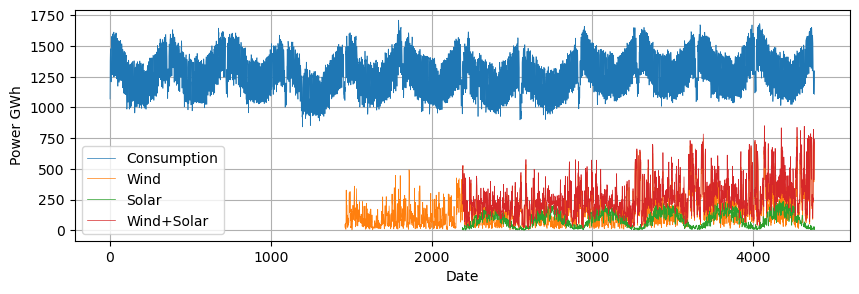

In [12]:
plt.rcParams['figure.figsize'] = 11,3
df.plot(grid=True, lw=0.5, figsize=(10,3))
plt.xlabel('Date')
plt.ylabel('Power GWh')
plt.show()

In [14]:
# x axes is not a real date

In [13]:
df.dtypes

Date            object
Consumption    float64
Wind           float64
Solar          float64
Wind+Solar     float64
dtype: object

In [15]:
df.Date = pd.to_datetime(df.Date, format='%Y-%m-%d')

In [16]:
df.head()

,Date,Consumption,Wind,Solar,Wind+Solar
0,2006-01-01,1069.184,NaN,NaN,NaN
1,2006-01-02,1380.521,NaN,NaN,NaN
2,2006-01-03,1442.533,NaN,NaN,NaN
3,2006-01-04,1457.217,NaN,NaN,NaN
4,2006-01-05,1477.131,NaN,NaN,NaN


In [17]:
df.dtypes

Date           datetime64[ns]
Consumption           float64
Wind                  float64
Solar                 float64
Wind+Solar            float64
dtype: object

In [18]:
df.set_index('Date', inplace=True) #change date to index of DataFrame

In [19]:
df.head()

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.184,NaN,NaN,NaN
2006-01-02,1380.521,NaN,NaN,NaN
2006-01-03,1442.533,NaN,NaN,NaN
2006-01-04,1457.217,NaN,NaN,NaN
2006-01-05,1477.131,NaN,NaN,NaN


In [20]:
df.shape

(4383, 4)

In [21]:
df.dtypes

Consumption    float64
Wind           float64
Solar          float64
Wind+Solar     float64
dtype: object

In [22]:
df.index[:10]

DatetimeIndex(['2006-01-01', '2006-01-02', '2006-01-03', '2006-01-04',
               '2006-01-05', '2006-01-06', '2006-01-07', '2006-01-08',
               '2006-01-09', '2006-01-10'],
              dtype='datetime64[ns]', name='Date', freq=None)

<Axes: xlabel='Date'>

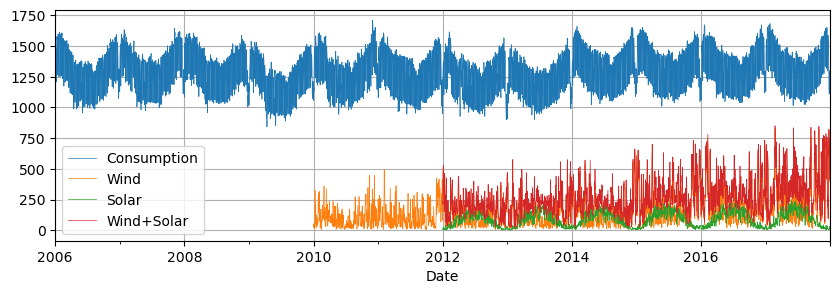

In [23]:
df.plot(grid=True, lw=0.5, figsize=(10,3))

In [24]:
#x already label date but in a Year

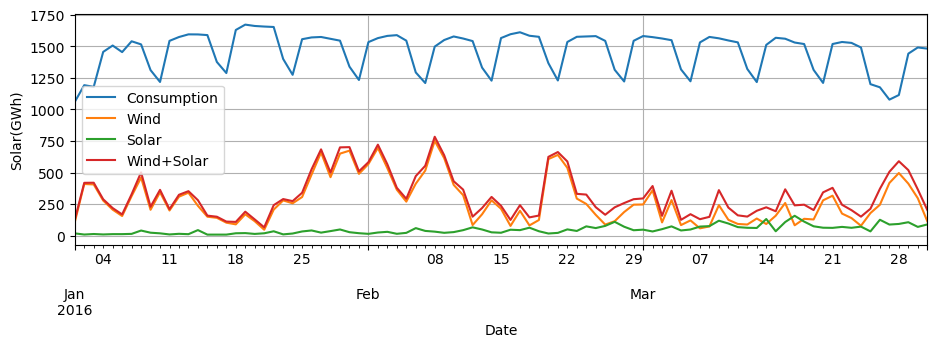

In [25]:
df.loc['2016-1':'2016-3'].plot(grid=True)
plt.ylabel('Solar(GWh)');
plt.show()

In [26]:
# this graph => x axes show day and month 

<Axes: xlabel='Date'>

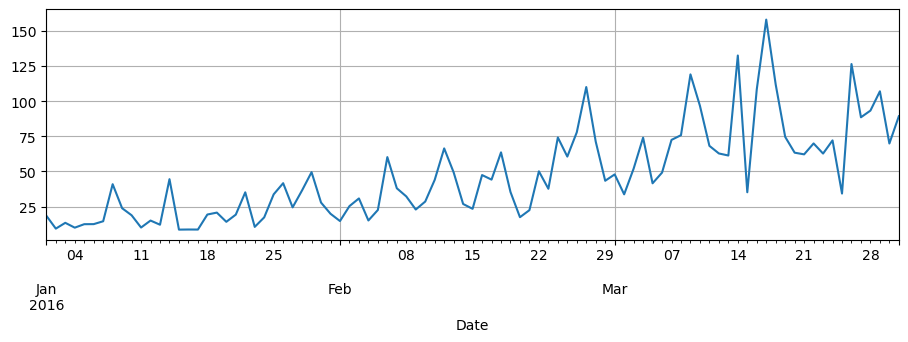

In [27]:
df.Solar.loc['2016-1':'2016-3'].plot(grid=True)

In [28]:
#this graph show only data of solar

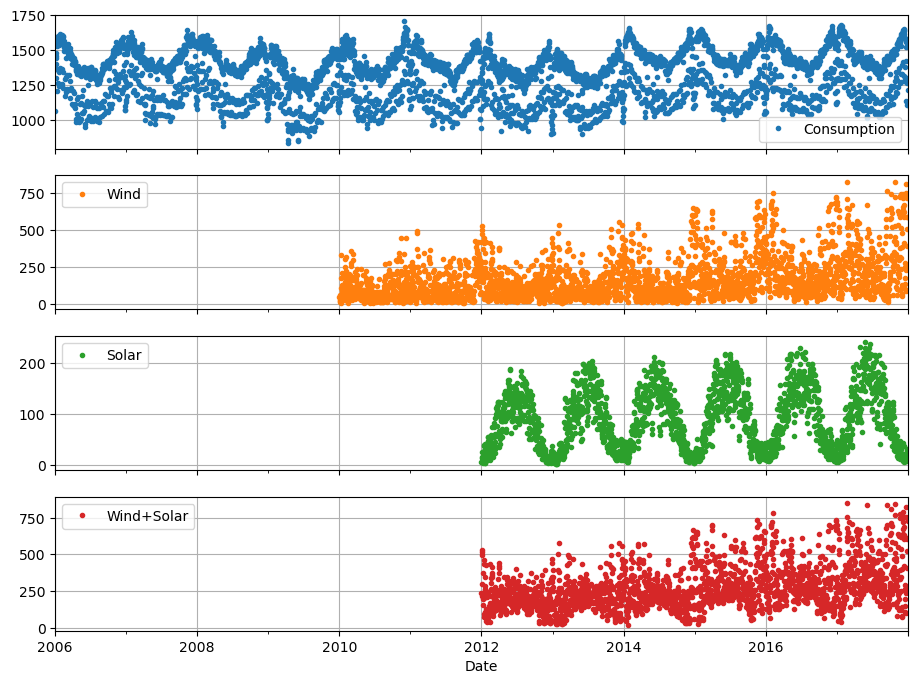

In [29]:
df.plot(marker='.', linestyle='None', figsize=(11,8), subplots=True, grid=True)
plt.show()

In [30]:
df.loc['2017-1-5']

Consumption    1547.238
Wind            261.758
Solar            20.797
Wind+Solar      282.555
Name: 2017-01-05 00:00:00, dtype: float64

In [32]:
# data in Jan of 2017
df.loc['2017-1']

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2017-01-01,1130.413,307.125,35.291,342.416
2017-01-02,1441.052,295.099,12.479,307.578
2017-01-03,1529.990,666.173,9.351,675.524
2017-01-04,1553.083,686.578,12.814,699.392
2017-01-05,1547.238,261.758,20.797,282.555
2017-01-06,1501.795,115.723,33.341,149.064
2017-01-07,1405.145,252.307,8.387,260.694
2017-01-08,1301.011,41.261,4.991,46.252
2017-01-09,1604.348,190.983,7.070,198.053


In [33]:
date_range = pd.date_range('2017-1-1', periods=5, freq='d')
df.loc[date_range]

,Consumption,Wind,Solar,Wind+Solar
2017-01-01,1130.413,307.125,35.291,342.416
2017-01-02,1441.052,295.099,12.479,307.578
2017-01-03,1529.990,666.173,9.351,675.524
2017-01-04,1553.083,686.578,12.814,699.392
2017-01-05,1547.238,261.758,20.797,282.555


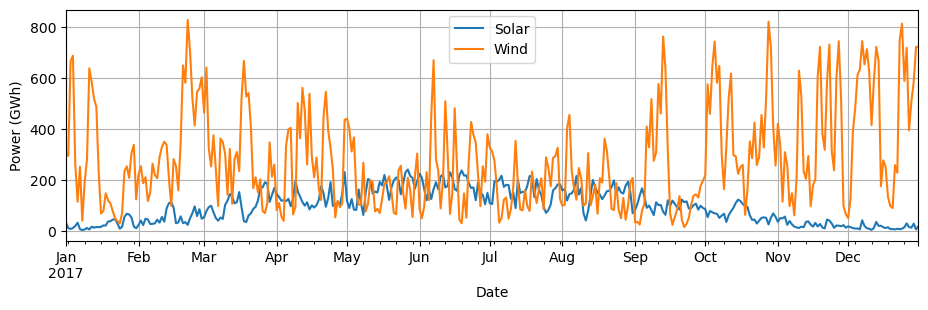

In [34]:
cols_plot = ['Solar','Wind']
df[cols_plot].loc['2017'].plot(grid=True)
plt.ylabel('Power (GWh)');
plt.show()

In [35]:
#from graph it can be includes that Solar can Produce a lot of electricity in the middle of the year but during this period it produces little electricity from wind.
#wind can product a lot of electricity during At the beginning and at the end of the year (Sep-Dec) 

In [36]:
#Q: Will other years have the same results as 2017?

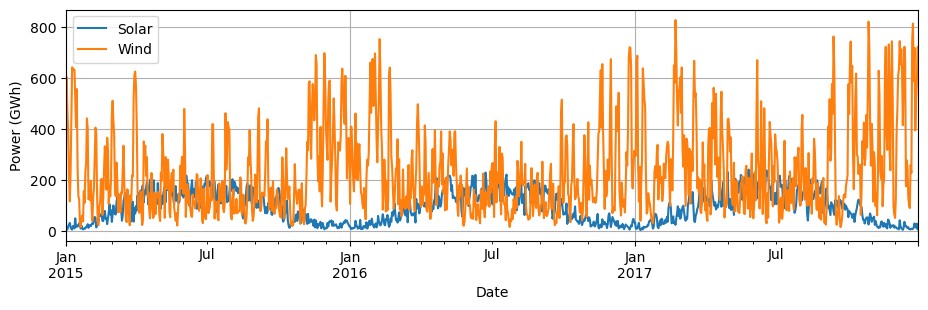

In [37]:
cols_plot = ['Solar','Wind']
df[cols_plot].loc['2015':'2017'].plot(grid=True)
plt.ylabel('Power (GWh)');
plt.show()

In [38]:
# In conclusion Going back 2 years, the amount of electricity produced by wind and solar energy has a similar trend to 2017.

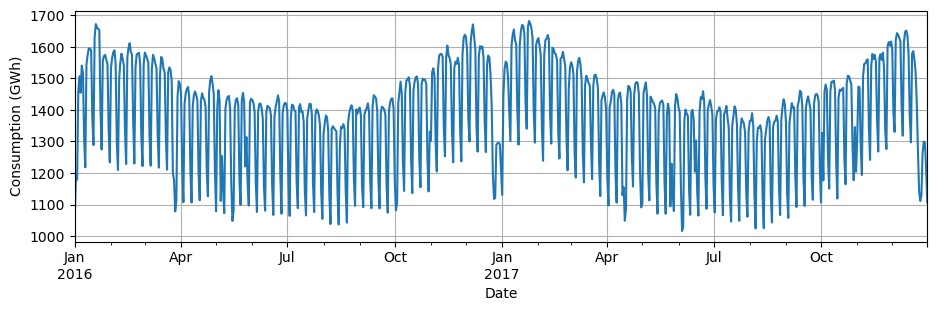

In [39]:
df.Consumption.loc['2016':'2017'].plot(grid=True)
plt.ylabel('Consumption (GWh)');
plt.show()

In [40]:
# In conclusion during the middle of the year have ratio of electricity usage less than The biggining and the last of the year .
# at the highest amount of electricity usage at 1600 GWh

In [44]:
start, end = '2017-12-1', '2017-12-7'
columns = ['Consumption', 'Wind', 'Solar']

In [46]:
df[columns][start:end].round(1)

,Consumption,Wind,Solar
Date,,,
2017-12-01,1593.0,52.3,19.3
2017-12-02,1391.9,126.3,16.5
2017-12-03,1330.3,387.5,12.4
2017-12-04,1621.0,479.8,10.7
2017-12-05,1643.7,611.5,11.0
2017-12-06,1639.1,632.5,7.6
2017-12-07,1628.5,743.7,43.0


In [47]:
df_weekly_roll = df[columns].rolling(7, center=True).mean()
df_weekly_roll[start:end].round(1)

,Consumption,Wind,Solar
Date,,,
2017-12-01,1538.9,246.7,16.7
2017-12-02,1543.0,260.5,15.5
2017-12-03,1548.0,336.6,13.1
2017-12-04,1549.6,433.4,17.2
2017-12-05,1553.2,519.2,17.4
2017-12-06,1556.6,602.9,16.8
2017-12-07,1554.8,636.5,16.4


In [48]:
#mean = 1549.6

In [49]:
df[columns][start:end].mean().round(1)

Consumption    1549.6
Wind            433.4
Solar            17.2
dtype: float64

In [51]:
df.shape

(4383, 4)

In [52]:
df_weekly_roll.shape

(4383, 3)

In [53]:
#Resample

In [54]:
df_weekly_resampling = df[columns].resample('7d').mean()
df_weekly_resampling.tail()

,Consumption,Wind,Solar
Date,,,
2017-12-03,1556.561034,602.878429,16.795857
2017-12-10,1546.841243,495.705857,17.758286
2017-12-17,1462.551239,258.776143,10.276714
2017-12-24,1208.214129,617.734286,17.807143
2017-12-31,1107.114880,721.176000,19.980000


In [55]:
df_weekly_resampling.shape

(627, 3)

In [56]:
df_weekly_resampling = df[columns].resample('m').sum()
df_weekly_resampling.tail().round(1)

,Consumption,Wind,Solar
Date,,,
2017-08-31,40029.8,5499.8,4602.8
2017-09-30,40078.6,6287.7,3079.3
2017-10-31,42355.2,12480.1,2130.6
2017-11-30,44339.7,10259.0,831.0
2017-12-31,44511.1,14725.4,494.2


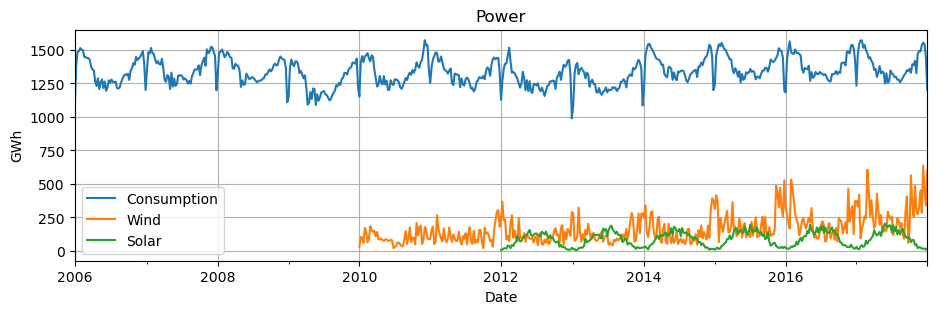

In [57]:
df_resampling = df[columns].resample('1w').mean()    #weekly resample


df_resampling.plot(grid=True)
plt.ylabel('GWh');
plt.title('Power')
plt.show()

In [58]:
#compare between 1) raw data 2) Resample 3) Rolling

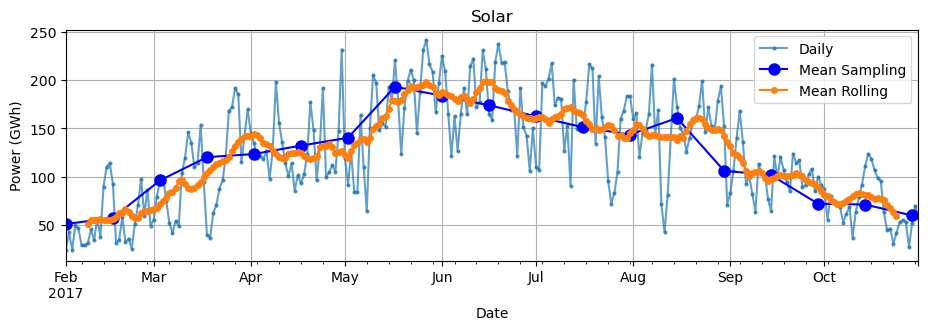

In [59]:
start, end = '2017-2','2017-10'
df.Solar.loc[start:end].plot(marker='o', label='Daily', markersize=2, alpha=0.7)
df.Solar.loc[start:end].resample('15d').mean().plot(marker='o', c='blue',markersize=8, label='Mean Sampling')
df.Solar.loc[start:end].rolling(15, center=True).mean().plot(marker='o',markersize=4,label='Mean Rolling')

plt.ylabel('Power (GWh)');
plt.title('Solar')
plt.legend()
plt.grid()
plt.show()

In [60]:
#The real data graph has peaks due to daily recordings. The data fluctuates significantly.
#Rolling and resampling will average the data, reducing the peaks, making it suitable for trend analysis or for reducing noise, especially in cases where reading sensor and other signal data.
#Resampling will have a more zigzag or step-like appearance compared to rolling due to the reduced number of data points as specified.

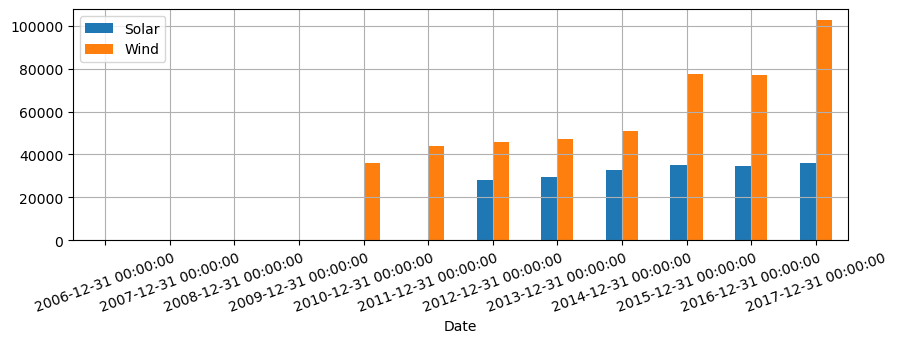

In [61]:
columns = ['Solar','Wind']
yearly = df[columns].resample('y').sum()

yearly.plot(kind='bar', figsize=(10,3), rot=20)
plt.grid()
plt.show()

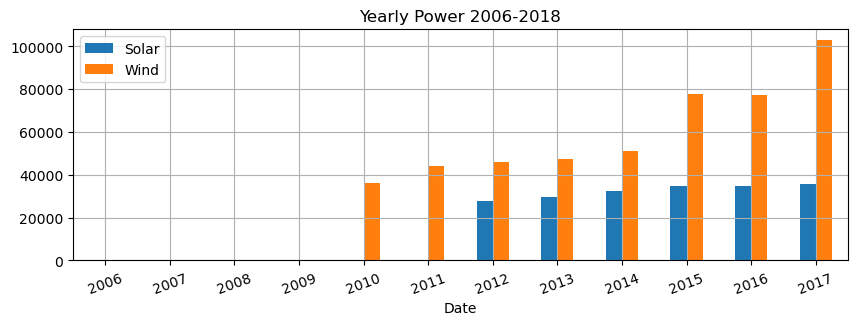

In [63]:
def x_label(datetime):
    lb = str(datetime.year)
    return lb

ax = yearly.plot(kind='bar', figsize=(10,3), rot=20)
ax.set_xticklabels(map(lambda x: x_label(x), yearly.index))
ax.set(title='Yearly Power 2006-2018')
plt.grid()
plt.show()

In [70]:
import pandas as pd
import numpy as np

range = pd.date_range('2020-01-1','2020-02-28',freq='10min') 
df = pd.DataFrame(index=range)

df['temp'] = np.random.randint(low=10, high=40, size=df.shape[0])

df['humid'] = np.random.randint(low=50, high=70, size=df.shape[0])
df.reset_index(inplace=True)
df.columns = ['time','temp','humid']

In [71]:
df

,time,temp,humid
0,2020-01-01 00:00:00,27,59
1,2020-01-01 00:10:00,22,56
2,2020-01-01 00:20:00,32,68
3,2020-01-01 00:30:00,38,56
4,2020-01-01 00:40:00,32,59
...,...,...,...
8348,2020-02-27 23:20:00,12,67
8349,2020-02-27 23:30:00,34,50
8350,2020-02-27 23:40:00,32,68
8351,2020-02-27 23:50:00,27,54


In [72]:
df.time = pd.to_datetime(df.time)

In [73]:
df.dtypes

time     datetime64[ns]
temp              int64
humid             int64
dtype: object

In [74]:
df.set_index('time', inplace=True)

In [76]:
df.loc['2020-01-15'].head()

,temp,humid
time,,
2020-01-15 00:00:00,29,55
2020-01-15 00:10:00,15,61
2020-01-15 00:20:00,28,53
2020-01-15 00:30:00,21,55
2020-01-15 00:40:00,25,62


In [77]:
chk_time = pd.to_datetime('2020-1-18 3pm')
df.loc[chk_time]

temp     17
humid    65
Name: 2020-01-18 15:00:00, dtype: int64

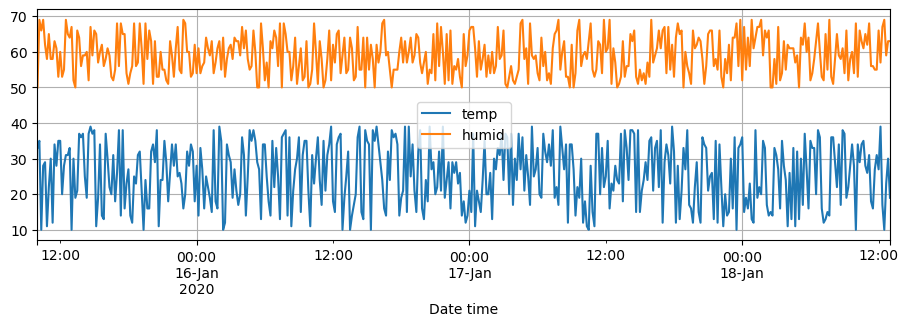

In [83]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = 11,3

start = pd.to_datetime('2020-1-15 10am')
end = pd.to_datetime('2020-1-18 1pm')

df.loc[start:end].plot(grid=True)
plt.xlabel('Date time')
plt.show()

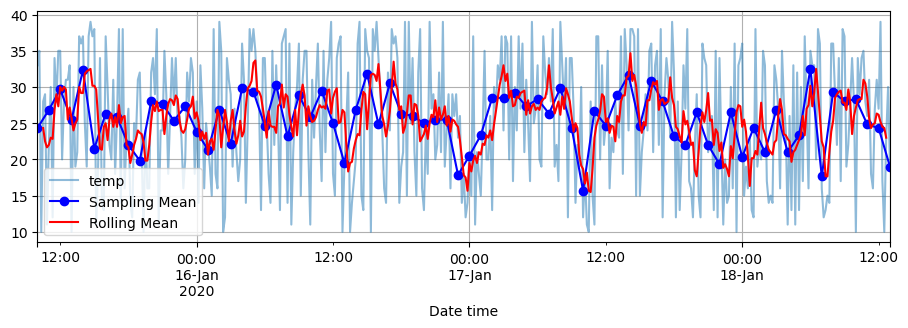

In [85]:
df_temp = df.temp.loc[start:end]
df_sampling = df.temp.loc[start:end].resample('1h').mean()
df_rolling = df.temp.loc[start:end].rolling(6,center=True).mean()

df_temp.plot(grid=True, alpha=0.5)
df_sampling.plot(c='b', marker='o', label='Sampling Mean')
df_rolling.plot(c='r', label='Rolling Mean', grid=True)
plt.xlabel('Date time')
plt.legend()
plt.savefig('picture/timeseries06-datetime.png', dpi=120)
plt.show()

In [88]:
uri = 'data/date-Th.csv'
df = pd.read_csv(uri)
df.head()

,Name,Age,Score,Date
0,Kobkiat,25,35,1/8/2560
1,ณิแนน,22,26,20/8/2560
2,จอห์น,25,32,1/7/2561
3,Tim,35,29,11/12/2561
4,Steal,32,27,21/12/2561


In [ ]:
#พศ => คศ

In [89]:
df.dtypes

Name     object
Age       int64
Score     int64
Date     object
dtype: object

In [91]:
df['D'] = df.Date.str.split('/', expand=True)[0]
df['M'] = df.Date.str.split('/', expand=True)[1]
df['Y'] = df.Date.str.split('/', expand=True)[2]

In [92]:
df.Y = df.Y.astype(int)

In [93]:
df['Y'] = df['Y'] -543
df.Y= df.Y.astype('str')

In [94]:
df['Date2'] = df.Y + '-' + df.M + '-' + df.D
df

,Name,Age,Score,Date,D,M,Y,Date2
0,Kobkiat,25,35,1/8/2560,1,8,2017,2017-8-1
1,ณิแนน,22,26,20/8/2560,20,8,2017,2017-8-20
2,จอห์น,25,32,1/7/2561,1,7,2018,2018-7-1
3,Tim,35,29,11/12/2561,11,12,2018,2018-12-11
4,Steal,32,27,21/12/2561,21,12,2018,2018-12-21


In [95]:
df.drop(columns=['Y', 'M', 'D'], inplace=True)

In [96]:
df

,Name,Age,Score,Date,Date2
0,Kobkiat,25,35,1/8/2560,2017-8-1
1,ณิแนน,22,26,20/8/2560,2017-8-20
2,จอห์น,25,32,1/7/2561,2018-7-1
3,Tim,35,29,11/12/2561,2018-12-11
4,Steal,32,27,21/12/2561,2018-12-21


In [97]:
def get_datetime_En(sc):
    return str(int(sc.split('/')[2])-543) + '-' + sc.split('/')[1] + '-' +sc.split('/')[0]

In [98]:
df['Date3'] = df.Date.apply(get_datetime_En).head()
df.head()

,Name,Age,Score,Date,Date2,Date3
0,Kobkiat,25,35,1/8/2560,2017-8-1,2017-8-1
1,ณิแนน,22,26,20/8/2560,2017-8-20,2017-8-20
2,จอห์น,25,32,1/7/2561,2018-7-1,2018-7-1
3,Tim,35,29,11/12/2561,2018-12-11,2018-12-11
4,Steal,32,27,21/12/2561,2018-12-21,2018-12-21


In [99]:
df.dtypes

Name     object
Age       int64
Score     int64
Date     object
Date2    object
Date3    object
dtype: object

In [100]:
df.Date2=pd.to_datetime(df.Date2)

In [101]:
df.set_index('Date2', inplace=True)

In [112]:
df

,Name,Age,Score
Date2,,,
2017-08-01,Kobkiat,25,35
2017-08-20,ณิแนน,22,26
2018-07-01,จอห์น,25,32
2018-12-11,Tim,35,29
2018-12-21,Steal,32,27


In [113]:
df.loc['2017']

,Name,Age,Score
Date2,,,
2017-08-01,Kobkiat,25,35
2017-08-20,ณิแนน,22,26
